In [124]:
import pandas as pd
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [125]:
df = pd.read_csv(r'C:\Users\Narmina Mehtiyeva\Desktop\car_price_prediction\car_price_data.csv')

In [126]:
df_new = df.drop(['Unnamed: 0', 'Links'], axis = 1)
mileage_list = list(df_new['Mileage'])
mileage_list = [re.sub(r'\s','', i) for i in mileage_list]
mileage_list = [re.findall(r'\d+', i) for i in mileage_list]
mileage_pd = pd.DataFrame(mileage_list).fillna(0)
mileage_pd = mileage_pd.astype('int32')
df_new['Mileage'] = mileage_pd
price_list = list(df_new['Price'])
price_list = [re.sub(r'\s','', i) for i in price_list]
price_list = [re.findall(r'\d+', i) for i in price_list]
price_pd = pd.DataFrame(price_list).fillna(0)
price_pd = price_pd.astype('int32')
df_new['Price'] = price_pd
fuel_list = list(df_new['Fuel_type'])
fuel_list = [re.findall(r'[A-Z]\w+', i) for i in fuel_list[25:]]
fuel_list = list(df_new['Fuel_type'])
fuel_list = [re.findall(r'[A-Z]\D+', i) for i in fuel_list]
fuel_pd = pd.DataFrame(fuel_list)
fuel_pd.drop(columns=[0,1],axis = 1, inplace = True)
df_new['Fuel_type'] = fuel_pd
# df_new['New'] = df_new['New'].replace({'Bəli': 0, 'Xeyr': 1})

In [127]:
#Label encoding
label_encoder = preprocessing.LabelEncoder() 
df_new['New']= label_encoder.fit_transform(df_new['New']) 
df_new['Gear_box']= label_encoder.fit_transform(df_new['Gear_box']) 
df_new['Fuel_type']= label_encoder.fit_transform(df_new['Fuel_type']) 
#One-Hot encoding
df_new = pd.get_dummies(df_new, columns=['Marka','Model','Color'], dtype = 'int')

In [128]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Columns: 254 entries, Year to Color_Yaşıl
dtypes: float64(1), int32(2), int64(251)
memory usage: 19.2 MB


In [129]:
df_new

,Year,Engine,Fuel_type,Mileage,Gear_box,New,Price,Marka_Audi,Marka_Avatr,Marka_BMW,...,Color_Mavi,Color_Narıncı,Color_Qara,Color_Qırmızı,Color_Qızılı,Color_Qəhvəyi,Color_Sarı,Color_Tünd qırmızı,Color_Yaş Asfalt,Color_Yaşıl
0,2015,2.0,3,121000,0,1,28000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,2.0,1,60000,0,1,30700,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2021,2.0,2,52000,4,1,22650,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1999,2.3,0,284000,0,1,12450,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2024,3.0,3,0,0,0,241300,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,2024,2.0,3,5200,2,1,158000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9956,2004,2.3,1,350000,1,1,9500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9957,2014,1.6,0,180000,0,1,24000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9958,2024,1.5,3,0,2,0,52500,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

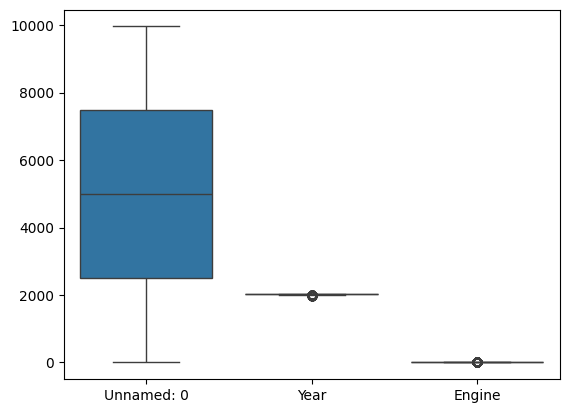

In [130]:
sns.boxplot(df)